# Word Embeddings Model

In [1]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sentences for demonstration
review=["I like summers",
       "I love monsoon and love summers",
       "I love skiing in winters",
       "poor product",
       "poor quality food"]

In [3]:
sentiment=np.array([1,1,1,0,0])

In [4]:
one_hot("I like summers",25)

[3, 15, 3]

In [5]:
# Convert each text to a sequence of one-hot encoded vectors
size=25
encode_reviews=[one_hot(i,size) for i in review]
encode_reviews

[[3, 15, 3], [3, 6, 12, 9, 6, 3], [3, 6, 22, 15, 21], [12, 18], [12, 10, 18]]

In [6]:
# Pad sequences to make them of equal length
max_length=3
padded_reviews=pad_sequences(encode_reviews,maxlen=max_length,padding="post")
padded_reviews

array([[ 3, 15,  3],
       [ 9,  6,  3],
       [22, 15, 21],
       [12, 18,  0],
       [12, 10, 18]])

In [7]:
# Define the model
embeded_size=5
model=Sequential()
model.add(Embedding(size,embeded_size,input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [8]:
X=padded_reviews
Y=sentiment

In [9]:
# Compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 5)              125       
                                                                 
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Train the model 
model.fit(X,Y,epochs=55,verbose=0)

In [11]:
# Evaluate the model
loss,accuracy=model.evaluate(X,Y)

1/1 [==============================] - 0s 390ms/step - loss: 0.5945 - accuracy: 1.0000


In [12]:
weights=model.get_layer("embedding").get_weights()[0]
len(weights)

25

In [13]:
weights[10]

array([-0.04524997,  0.02861943, -0.06293879, -0.04738582, -0.06963297],
      dtype=float32)

In [14]:
weights[5]

array([ 0.01127609, -0.00169348, -0.04861788, -0.00132761, -0.01264695],
      dtype=float32)

In [15]:
# Evaluate the confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report
Y_pred=model.predict(X)
Y_pred_out=[np.argmax(i) for i in Y_pred]
print("classification report :",classification_report(Y,Y_pred_out))

1/1 [==============================] - 0s 147ms/step
classification report :               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



In [16]:
Y_p_l=[np.argmax(i)for i in Y_pred]
Y_p_l[:4]

[0, 0, 0, 0]

In [17]:
Y[:5]

array([1, 1, 1, 0, 0])

In [18]:
confusion_matrix=tf.math.confusion_matrix(labels=Y,predictions=(Y_p_l))
confusion_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 0],
       [3, 0]])>

Text(95.72222222222221, 0.5, 'actual')

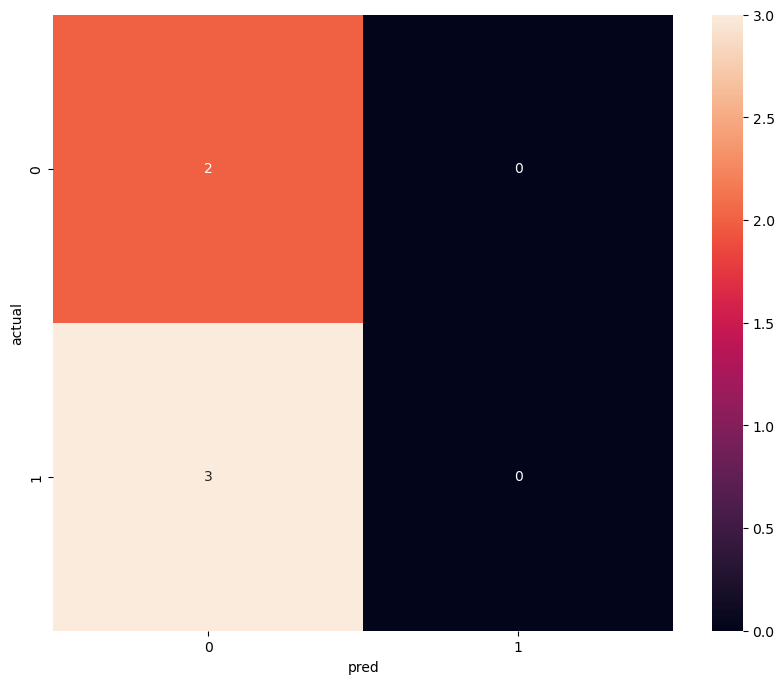

In [19]:
# plot the heat_map
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.xlabel("pred")
plt.ylabel("actual")

# Word2Vec Model

In [20]:
# Import necessary libraries
import gensim
import pandas as pd
from gensim.utils import simple_preprocess

In [21]:
# Read the CSV file
df=pd.read_csv("movies.csv")

In [22]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
df.shape

(9742, 3)

In [24]:
df.genres[0]

'Adventure|Animation|Children|Comedy|Fantasy'

In [25]:
reveiw_text=df.genres.apply(gensim.utils.simple_preprocess)
reveiw_text

0       [adventure, animation, children, comedy, fantasy]
1                          [adventure, children, fantasy]
2                                       [comedy, romance]
3                                [comedy, drama, romance]
4                                                [comedy]
                              ...                        
9737                 [action, animation, comedy, fantasy]
9738                         [animation, comedy, fantasy]
9739                                              [drama]
9740                                  [action, animation]
9741                                             [comedy]
Name: genres, Length: 9742, dtype: object

In [26]:
# Define the Word2Vec model
model=gensim.models.Word2Vec(window=10,min_count=2,workers=4)

In [27]:
model.build_vocab(reveiw_text,progress_per=1200)

In [28]:
model.epochs

5

In [29]:
# Training the Word2Vec model
model.train(reveiw_text,total_examples=model.corpus_count,epochs=model.epochs)

(17965, 116095)

In [30]:
# Find similar words
model.wv.most_similar("action")

[('no', 0.9973030686378479),
 ('listed', 0.9972233176231384),
 ('genres', 0.9972149729728699),
 ('imax', 0.996848464012146),
 ('animation', 0.9966959357261658),
 ('fantasy', 0.9966725707054138),
 ('children', 0.9965224862098694),
 ('comedy', 0.9963303804397583),
 ('thriller', 0.9963111281394958),
 ('horror', 0.9962671995162964)]